Looking at the data source https://www.kaggle.com/crawford/laser-incident-report/kernels I wished to test the hypothesis that the number of laser incidents (people shining laser pointers at airplanes) would not be equal across all days of the week. To do this I first manipulated the dataframes using this script( https://www.kaggle.com/camnugent/faa-laser-date-and-time-cleanup ) to merge the .csv files and remove the Totals rows. With that done I loaded the new dataframe into R and began to explore the hypothesis that there are unequal numbers of laser incidents across the days of the week.

H0 =  laser incidents occur with equal probability on all days of the week
HA = the probability of laser incidents is not equal across all days of the week

In [2]:
laser_dat = read.csv('../input/adjusted_laser_data.csv')
head(laser_dat)

X,ACID,No..A.C,TYPE.A.C,ALT,MAJOR.CITY,COLOR,Injury.Reported,CITY,STATE,hr_adj,date_time,day_of_week,holidays
0,AIR1,1,HELO,2000,LEX,Green,NO,Lexington,Kentucky,1,10-01-01 1:02,Friday,TRUE
1,ASA513,1,B737,10000,LAX,Green,NO,Los Angeles,California,4,10-01-01 4:03,Friday,TRUE
2,EGF3002,1,E135,7000,LAX,Green,NO,Los Angeles,California,2,10-01-01 2:46,Friday,TRUE
3,EGF3086,1,E135,7000,LAX,Green,NO,Los Angeles,California,1,10-01-01 1:57,Friday,TRUE
4,JBU300,1,A320,12500,SLI,Green,NO,Los Alamitos,California,2,10-01-01 2:58,Friday,TRUE
5,JBU303,1,A320,2000,LGB,Green,NO,Los Angeles,California,2,10-01-01 2:55,Friday,TRUE


I then set the order of the factors and grouped the incidents into a table

In [3]:

laser_dat$day_of_week = factor(laser_dat$day_of_week,c('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
day_breakdown = table(laser_dat$day_of_week)
day_breakdown



   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
     2272      2375      2473      2498      2932      2806      2327 

Eyeballing those numbers there does appear to be some variance. How do they look on a barplot?

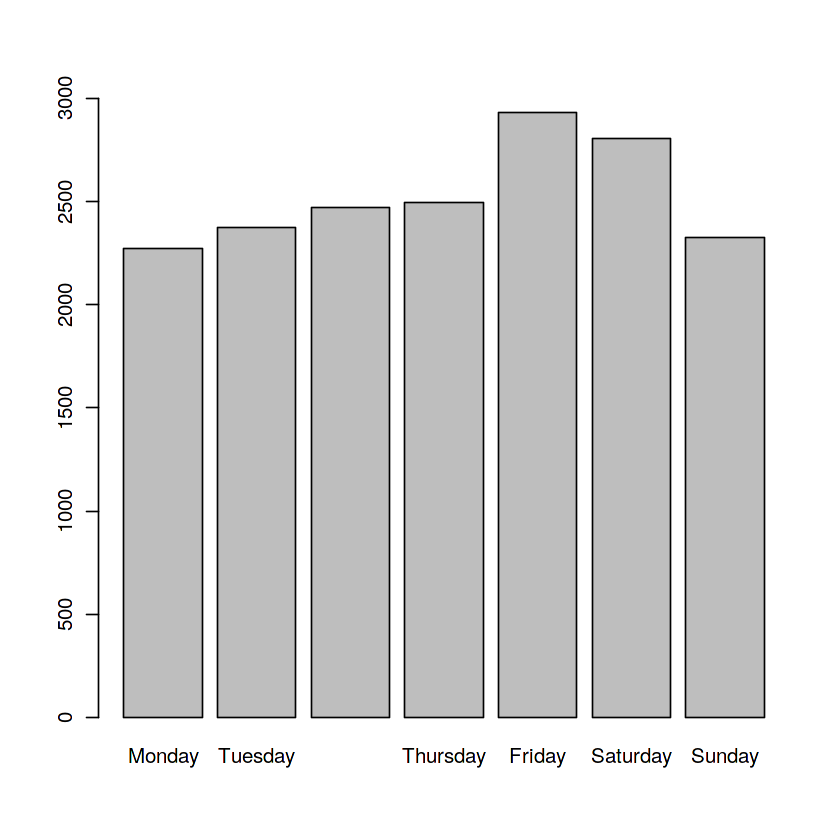

In [4]:
barplot(day_breakdown,ylim=c(0,3000))

Surge near the weeked (Friday/Saturday) by the looks of things. Running a chi-sq test can we detect a significant difference?

In [5]:
results = chisq.test(day_breakdown)
results


	Chi-squared test for given probabilities

data:  day_breakdown
X-squared = 147.95, df = 6, p-value < 2.2e-16


In [6]:
results$observed


   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
     2272      2375      2473      2498      2932      2806      2327 

In [7]:
results$expected

Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
 2526.143  2526.143  2526.143  2526.143  2526.143  2526.143  2526.143

So based on the chi-squared test we can conclude that there is a significant difference in the number of laser incidents across the days of the week (p<2.2e-16). Based on examination of the barplot and frequency table, it appears that this difference is attributed to a higher number of incidents on Friday and Saturday. Since these are the prime nights for alcohol induced mischief, these results lead me to suspect that alcohol may be playing a role in people's deciding to shine laser pointers at aircraft.